In [1]:
import datetime
import os

import plotly.plotly as py

from obs_data import * 
from plotFunctions import *
import mpld3
mpld3.enable_notebook()

import seaborn as sns
sns.set_context(rc={'lines.markeredgewidth': 0.1})
sns.set(style="whitegrid")

# Plot graphs within this document
# %matplotlib inline
%matplotlib notebook
# For non notebook: https://stackoverflow.com/questions/9651092/my-matplotlib-pyplot-legend-is-being-cut-off

print(os.getcwd())

PC = False

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


## Get observed data

In [2]:
north_obs = getSoilData("North", tss=True)
north_obs.head()

north_conc_obs = north_obs[['Jdays', 'Conc.mug.g.dry.soil']]
north_conc_obs.head()

,Jdays,Conc.mug.g.dry.soil
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,NaN


### Model version to inspect

In [3]:
version = "v9"

In [4]:
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v9/


In [5]:
folder = "1"

In [6]:
col = 'Conc.North'
conc_north_sim = pd.read_table(sim_path + folder + back + "resM_norCONC.tss", skiprows=4, delim_whitespace=True,
                         names=['Jdays', col],
                         header=None)
    
north = north_conc_obs.merge(conc_north_sim, left_on='Jdays', right_on='Jdays', how='outer')

north_short = north[169:286]
north_short.head(5)


,Jdays,Conc.mug.g.dry.soil,Conc.North
169,170,NaN,1.263200e-21
170,171,NaN,1.263200e-21
171,172,NaN,1.263200e-21
172,173,NaN,1.263200e-21
173,174,NaN,1.263200e-21


### Concentration

<IPython.core.display.Javascript object>


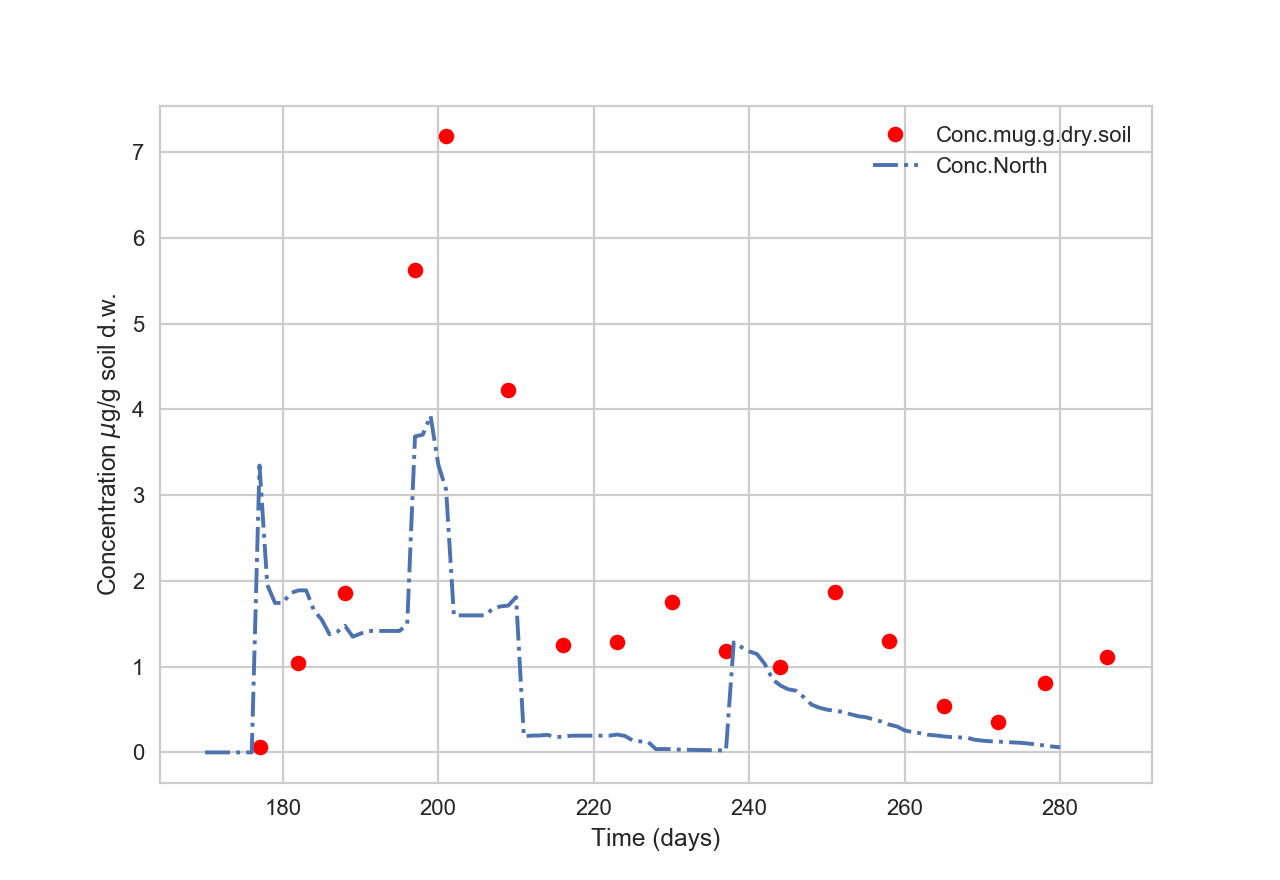

In [10]:
fig, ax1 = plt.subplots()
time = north_short.iloc[:, 0]
obs = north_short.iloc[:, 1]
sim = north_short.iloc[:, 2]

ylabel = 'Concentration ' + r'$\mu$' + 'g/g soil d.w.'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
ax1.plot(time, obs, 'ro')
ax1.plot(time, sim, linestyle='dashdot')
plt.legend(loc='upper right', ncol=1, shadow=True, fancybox=True) #  mode='expand',
plt.show()

In [40]:
obs.dtype

dtype('float64')

In [ ]:
start = 1
n_mods = n_tests + 1

fig, ax1 = plt.subplots()
time = data.iloc[:, 0]
legend = []

for i in range(start, n_mods):
    l = "N" + str(i)
    legend.append(l)
for i in range(1, n_mods):
    ax1.plot(time, data.iloc[:, i], label=legend[i-start])
ylabel = 'Nash'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='upper right', bbox_to_anchor=(1., 1), ncol=4, shadow=True, fancybox=True)
plt.legend(loc=4, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

## Plotting discharge 

**Observations = "obs"**

**Decreases** in lateral flow and **increases** in percolation potential improve nash coefficients. 

In [ ]:
obs.head()

In [ ]:
# Edit observations (select relevant columns)
obs['DayMoYr'] = pd.to_datetime(obs['DayMoYr'])  # Convert to Date object
obs = obs[['DayMoYr', 'Jdays', 'VolTot.L']]  # keep desired columns
obs['Q_obs.m3'] = obs['VolTot.L'] * 1 / 10 ** 3

# def liters_to_m3(row):
#     val = row['VolTot.L'] * 1 / 10 ** 3
#     return val

# obs['Q_obs.m3'] = obs.apply(liters_to_m3, axis=1)

In [ ]:
obs_short = obs[179:280]
obs_short.head()

### Import simulated data 

**Folder = Model run **

In [ ]:
folder = "1"

# Simulated Start time
#yy = 2015
#mm = 10
#dd = 1
#dt = datetime.date(yy, mm, dd)

### Daily components

In [ ]:
# Lateral FLow
oLF = pd.read_table(sim_path + folder + back + "res_o_accuLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)


# Runoff
ro = pd.read_table(sim_path + folder + back + "res_accuRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)

# Drainage
dr = pd.read_table(sim_path + folder + back + "res_o_accuDrain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

# Deep percolation
dp = pd.read_table(sim_path + folder + back + "res_accuPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)
#ETP
etp = pd.read_table(sim_path + folder + back + "res_accuEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'ETP.m3'],
                         header=None)

nq_sim = pd.read_table(sim_path + folder + back +  "res_n_accuVol_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iQ.m3'],
                         header=None) 

rain = pd.read_table(sim_path + folder + back + "res_accuRain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'Rain.m3'],
                         header=None) 

# Storage
store = pd.read_table(sim_path + folder + back + "res_accuStorage_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'ST.m3'],
                         header=None)


components = [oLF, ro, dr, dp, etp, store, nq_sim, obs_short, rain]


In [ ]:
components[4].tail()

In [ ]:
window = []
for i in components:
    c = i[160:280]
    window.append(c)
# nLF = nLF[160:300]
# nLF.head()

In [ ]:
# components =  [iLF, oLF, nLF, ro, dr, dp, etp, iq_sim, nq_sim, obs, rain]
fig, ax1 = plt.subplots()
time = window[0].iloc[:, 0]
oLF = window[0].iloc[:, 1]
ro = window[1].iloc[:, 1]
dr = window[2].iloc[:, 1]
dp = window[3].iloc[:, 1]
etp = window[4].iloc[:, 1]
sto = window[5].iloc[:, 1]

rain_vol = window[-1].iloc[:, 1]
obs_vol = window[-2].iloc[:, 3]
sim_vol = window[-3].iloc[:, 1]


legend = ["oLF", "ro", "dr", "dp", "etp", "sto", "Q-sim (m3/d)", "Q-obs (m3/d)", "Rain (m3/d)"]

ax1.plot(time, oLF, label=legend[0])
ax1.plot(time, ro, label=legend[1])
ax1.plot(time, dr, label=legend[2])
ax1.plot(time, dp, label=legend[3])

ax1.plot(time, rain_vol, label=legend[-1])
ax1.plot(time, obs_vol, linestyle='dashdot', label=legend[-2])
ax1.plot(time, sim_vol, linestyle='dashed', label=legend[-3])


# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.legend(loc=1, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

1. Problem appears to be that the basin is not filling up quickly enough (lateral flow discharge - red).

We could treat this by:
- Decreasing ETP
- Moving run-off to recharge (Paul's Ksat)
- Keeping dDP = 0 (avoids calibration of z2's drainage coefficient.

2. 

In [ ]:
fig, ax1 = plt.subplots()
time = window[0].iloc[:, 0]

ax1.plot(time, etp, label=legend[4])
ax1.plot(time, sto, label=legend[5])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
# plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.legend(loc=1, mode='expand', ncol=1, shadow=True, fancybox=True)
plt.show()

In [ ]:
import math as m
d1 = 1
s1 = 1
ksat = 43 # mm/d
# tau (percolation factor):
.0866*m.exp(d1*m.log10(s1*ksat))

In [ ]:
# Paul's Ksat values top-up Tau at 1
ksat = 279  
.0866*m.exp(s1*m.log10(s1*ksat))

In [ ]:
# Model's implementation:
# day 81 = 781 mm/day
ksat = 781
min(.0866*m.exp(s1*m.log10(s1*ksat)), 1)

### Total water

In [ ]:
# Lateral FLow
iLF_sum = pd.read_table(sim_path + folder + back + "res_i_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

oLF_sum = pd.read_table(sim_path + folder + back + "res_o_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'oLF.m3'],
                         header=None)

nLF_sum = pd.read_table(sim_path + folder + back + "res_n_totLatflow_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'nLF.m3'],
                         header=None)

# Runoff
ro_sum = pd.read_table(sim_path + folder + back + "res_totRunoff_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'RO.m3'],
                         header=None)

# Drainage
dr_sum = pd.read_table(sim_path + folder + back + "res_o_totDrain_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'iLF.m3'],
                         header=None)

# Deep percolation
dp_sum = pd.read_table(sim_path + folder + back + "res_totPercol_z2_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'DP.m3'],
                         header=None)

etp_sum = pd.read_table(sim_path + folder + back + "res_totEtp_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'etp.m3'],
                         header=None)

# Tot Discharge
q_i_sum = iLF_sum.merge(ro_sum, left_on='dt', right_on='dt', how='outer')
q_i_sum['q_i_sum'] = q_i_sum['iLF.m3'] + q_i_sum['RO.m3']
q_i_sum = q_i_sum.drop(['iLF.m3', 'RO.m3'], axis=1)

q_n_sum = pd.read_table(sim_path + folder + back + "res_q_sim_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_sim.m3'],
                         header=None)

tot_obs = pd.read_table(sim_path + folder + back + "res_q_obs_tot_m3.tss", skiprows=4, delim_whitespace=True, names=['dt', 'q_obs.m3'],
                         header=None)



totcomp = [iLF_sum, oLF_sum, nLF_sum, ro_sum, dr_sum, dp_sum, etp_sum, q_i_sum, q_n_sum, tot_obs]

tot_window = []
for i in totcomp:
    c = i[160:280]
    tot_window.append(c)
    

In [ ]:
tot_window[8].head()

In [ ]:
# components = [iLF, oLF, nLF, ro, dp, etp, iq_sim, nq_sim, obs]
fig, ax1 = plt.subplots()
time = tot_window[0].iloc[:, 0]
iLF = tot_window[0].iloc[:, 1]
oLF = tot_window[1].iloc[:, 1]
nLF = tot_window[2].iloc[:, 1]
ro = tot_window[3].iloc[:, 1]
dr = tot_window[4].iloc[:, 1]
dp = tot_window[5].iloc[:, 1]
etp = tot_window[6].iloc[:, 1]

sim_in_vol = tot_window[-3].iloc[:, 1]
sim_vol = tot_window[-2].iloc[:, 1]
obs_vol = tot_window[-1].iloc[:, 1]


legend = ["iLF", "oLF", "nLF", "ro", "dr", "dp", "etp", "Qin", "Q-sim (m3/d)", "Q-obs (m3/d)"]

ax1.plot(time, iLF, label=legend[0])
ax1.plot(time, oLF, label=legend[1])
ax1.plot(time, nLF, label=legend[2])
ax1.plot(time, ro, label=legend[3])
ax1.plot(time, dr, label=legend[4])
ax1.plot(time, dp, label=legend[5])
ax1.plot(time, etp, label=legend[6])

ax1.plot(time, obs_vol, label=legend[-1])
ax1.plot(time, sim_vol,  linestyle='dashed', label=legend[-2])
# ax1.plot(time, sim_vol, linestyle='dashdot', label=legend[1])
ylabel = 'm3/day'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel(ylabel)
plt.legend(loc='right', bbox_to_anchor=(1.15, .8), ncol=1, shadow=True, fancybox=True)
plt.show()

## Observations

Simulated disch is stil at half observed output. Likely due to:
- High evapotranspiration ...or 
- insufficient artificial drainage (so increase c_adr progressively)
- No outlet cell output considered (to include with all connected ditches)

TODO:
- Document isotope logic
- Check first reactive simulations

